# How to Form a Good Cointegrating (and Mean-Reverting) Pair of Stocks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS

import itertools

## Run cointegration (Engle-Granger) test for finding the pair assets

In [3]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import coint
import itertools

# List of stock tickers
tickers = [
    "KO", "PEP", "WMT", "COST", "MCD", "YUM", "AMZN", "BABA", 
    "V", "MA", "XOM", "CVX", "JNJ", "PG", "F", "GM"
]

# Download historical data for all stocks (last year as an example)
data = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Drop any stocks with missing data
data.dropna(inplace=True)

# Function to perform cointegration test on two stocks
def test_cointegration(stock1, stock2):
    result = coint(data[stock1], data[stock2])
    p_value = result[1]
    return p_value

# Prepare to store results
coint_results = {}

# Iterate over all unique pairs of stocks
for stock1, stock2 in itertools.combinations(data.columns, 2):
    p_value = test_cointegration(stock1, stock2)
    if p_value < 0.05:  # Only store pairs with p-value < 0.05
        coint_results[(stock1, stock2)] = p_value

# Display pairs with p-value < 0.05
print("\nPairs with p-value < 0.05 (suitable for pair trading):\n")
if not coint_results:
    print("No pairs with p-value < 0.05 were found.")
else:
    for pair, p_value in coint_results.items():
        print(f"{pair}: p-value = {p_value:.4f}")




[*********************100%%**********************]  16 of 16 completed



Pairs with p-value < 0.05 (suitable for pair trading):

('CVX', 'XOM'): p-value = 0.0181
('KO', 'YUM'): p-value = 0.0031
('PEP', 'YUM'): p-value = 0.0179


In [4]:
Pair_test = pd.merge(data['KO'], data['YUM'], on='Date')

In [5]:
Pair_test

,KO,YUM
Date,,
2023-01-03,59.665287,122.775803
2023-01-04,59.636856,124.439110
2023-01-05,58.954426,123.491402
2023-01-06,60.091808,125.996056
2023-01-09,59.343037,125.483505
...,...,...
2023-12-22,57.020824,128.081039
2023-12-26,57.255482,128.337189
2023-12-27,57.402138,128.908615


## Determine hedge ratio

In [6]:
model=OLS(Pair_test['KO'], Pair_test['YUM'])

In [7]:
results=model.fit()

In [8]:
hedgeRatio=results.params

In [9]:
hedgeRatio

YUM    0.452759
dtype: float64

##  spread = GLD - hedgeRatio*GDX

In [10]:
spread=Pair_test['KO']-hedgeRatio[0]*Pair_test['YUM']

C:\Users\Thana\AppData\Local\Temp\ipykernel_23260\2371843177.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spread=Pair_test['KO']-hedgeRatio[0]*Pair_test['YUM']


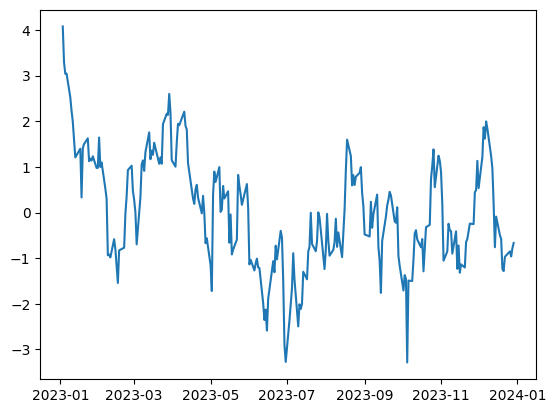

In [11]:
plt.plot(spread)

In [12]:
# Calculate the spread and Z-score
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()
z_score = (spread - spread_mean) / spread_std

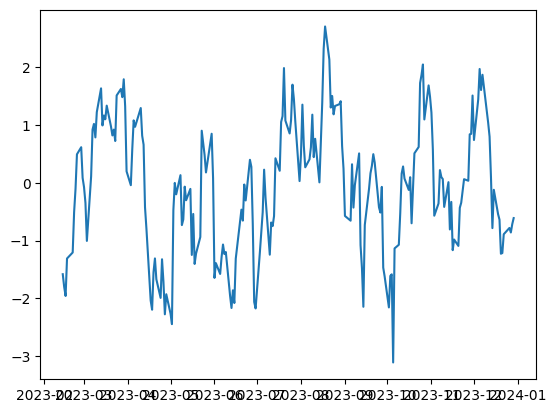

In [13]:
plt.plot(z_score)